# Dendrograma de palabras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


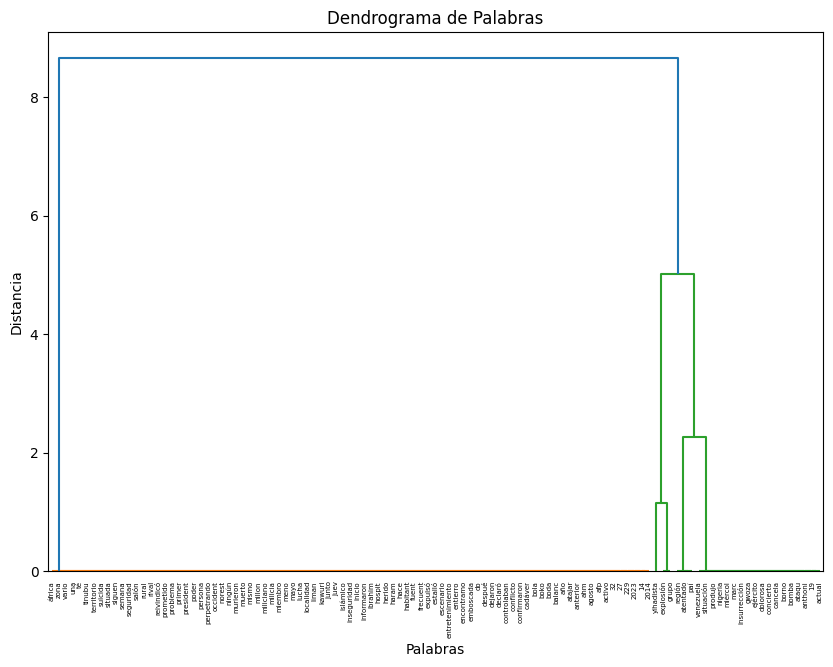

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Descargar las stopwords en español
nltk.download('stopwords')
nltk.download('punkt')

# Definir el texto
texto = """
Por lo menos 19 personas murieron por la explosión de una bomba en un salón de té en el noreste de Nigeria, escenario de una insurrección yihadista, informaron fuentes de seguridad este jueves 1 de agosto.

Marc Anthony cancela concierto en Venezuela ante “la dolorosa situación actual” del país
Entretenimiento
Marc Anthony cancela concierto en Venezuela ante “la dolorosa situación actual” del país
La explosión se produjo el miércoles en Kawuri, una localidad situada en el estado de Borno, donde estalló una insurrección yihadista hace 14 años.

Encontramos 19 cadáveres y 27 heridos, declaró a AFP Ibrahim Liman, miembro de una milicia que lucha contra los grupos yihadistas junto al ejército.

Otros dos milicianos confirmaron el balance de la explosión, que se produjo unas semanas después de los atentados suicidas que dejaron 32 muertos en una boda, un hospital y varios entierros de la región de Gwoza, en el mismo estado de Borno.

No es el primer atentado en Nigeria

Ningún grupo reivindicó la explosión del miércoles ni los anteriores ataques en la región de Gwoza.
Tanto el grupo yihadista Boko Haram como su rival, el grupo Estado Islámico del África Occidental, están activos en la región.

Los atentados con bomba son poco frecuentes desde que el ejército expulsó a los yihadistas de los territorios que controlaban al inicio del conflicto en 2014, pero siguen perpetrando ataques y emboscadas en las zonas rurales.

El presidente, Bola Ahmed Tinubu, en el poder desde mayo de 2023, había prometido atajar el problema de la inseguridad en este país de 229 millones de habitantes.
"""

# Inicializar el stemmer
stemmer = PorterStemmer()

# Tokenización y eliminación de stopwords
tokens = word_tokenize(texto.lower())
stop_words = set(stopwords.words('spanish'))
filtered_tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]

# Contar las palabras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(filtered_tokens)])
word_counts = X.toarray().flatten()

# Crear el dendrograma
distance_matrix = linkage(word_counts.reshape(-1, 1), method='ward')
plt.figure(figsize=(10, 7))
dendrogram(distance_matrix, labels=vectorizer.get_feature_names_out())
plt.title('Dendrograma de Palabras')
plt.xlabel('Palabras')
plt.ylabel('Distancia')
plt.show()
